In [1]:
# Download the dataset
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

# Create a directory and extract the dataset
!mkdir speech_commands && tar -xvzf speech_commands_v0.01.tar.gz -C speech_commands


Streaming output truncated to the last 5000 lines.
./up/6f9088d7_nohash_0.wav
./up/6f342826_nohash_0.wav
./up/e0a7c5a0_nohash_0.wav
./up/4d4e17f5_nohash_1.wav
./up/b0f24c9b_nohash_0.wav
./up/735845ab_nohash_2.wav
./up/53d5b86f_nohash_0.wav
./up/1a5b9ca4_nohash_1.wav
./up/23abe1c9_nohash_2.wav
./up/bdee441c_nohash_1.wav
./up/a1cff772_nohash_1.wav
./up/1ecfb537_nohash_3.wav
./up/37fc5d97_nohash_3.wav
./up/bd8412df_nohash_1.wav
./up/e53139ad_nohash_1.wav
./up/10ace7eb_nohash_3.wav
./up/30065f33_nohash_0.wav
./up/eefd26f3_nohash_0.wav
./up/c9b653a0_nohash_2.wav
./up/02746d24_nohash_0.wav
./up/e1469561_nohash_0.wav
./up/4bba14ce_nohash_0.wav
./up/b5d1e505_nohash_1.wav
./up/531a5b8a_nohash_1.wav
./up/0135f3f2_nohash_0.wav
./up/dbb40d24_nohash_4.wav
./up/e9287461_nohash_1.wav
./up/71e6ab20_nohash_0.wav
./up/ead2934a_nohash_1.wav
./up/f9af0887_nohash_0.wav
./up/ff63ab0b_nohash_0.wav
./up/f3d06008_nohash_0.wav
./up/918a2473_nohash_4.wav
./up/e54a0f16_nohash_0.wav
./up/cb8f8307_nohash_1.wav
./up

In [4]:
import os

# Path to dataset
data_path = "speech_commands"

# Count number of audio files
num_files = sum([len(files) for _, _, files in os.walk(data_path)])

print("Total number of rows (audio files):", num_files)


Total number of rows (audio files): 64732


In [7]:
ls speech_commands

_background_noise_/  down/   happy/   nine/  README.md  stop/             up/
bed/                 eight/  house/   no/    right/     testing_list.txt  validation_list.txt
bird/                five/   left/    off/   seven/     three/            wow/
cat/                 four/   LICENSE  on/    sheila/    tree/             yes/
dog/                 go/     marvin/  one/   six/       two/              zero/


In [5]:
labels = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d)) and d != "_background_noise_"]

print("Number of classes:", len(labels))
print("Classes:", labels)

Number of classes: 30
Classes: ['down', 'yes', 'on', 'tree', 'dog', 'stop', 'one', 'bed', 'eight', 'right', 'bird', 'up', 'three', 'two', 'off', 'zero', 'no', 'left', 'four', 'nine', 'go', 'seven', 'six', 'wow', 'five', 'marvin', 'sheila', 'happy', 'house', 'cat']


Count samples per class or class distribution

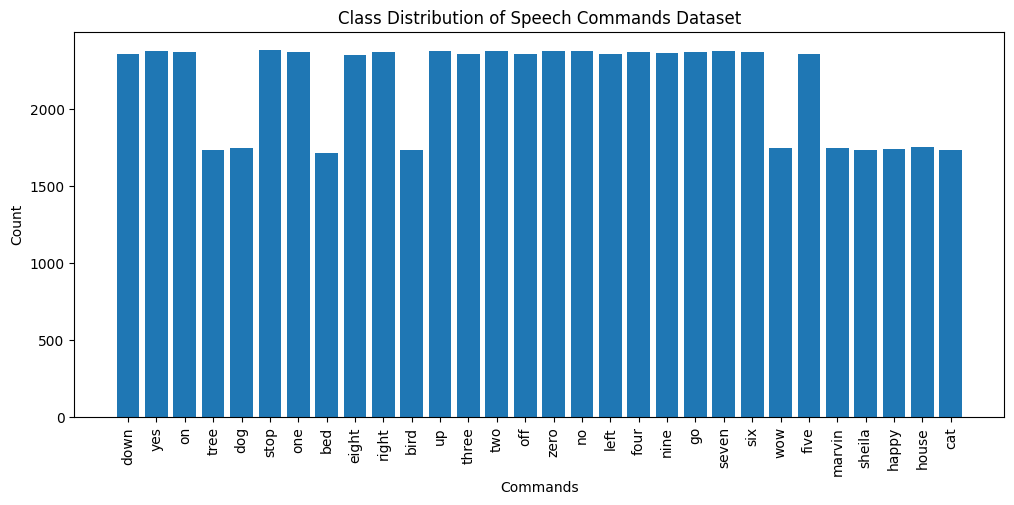

In [6]:
import collections
import matplotlib.pyplot as plt

label_counts = collections.Counter()

for label in labels:
    label_counts[label] = len(os.listdir(os.path.join(data_path, label)))

# Plot class distribution
plt.figure(figsize=(12, 5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks(rotation=90)
plt.xlabel("Commands")
plt.ylabel("Count")
plt.title("Class Distribution of Speech Commands Dataset")
plt.show()


In [12]:
import torchaudio
import librosa
import librosa.display
import torch

def load_audio(filepath):
    waveform, sample_rate = torchaudio.load(filepath)
    return waveform, sample_rate

# Example: Load an audio file
example_file = os.path.join(data_path, "yes", "0a7c2a8d_nohash_0.wav")
waveform, sample_rate = load_audio(example_file)

print(f"Sample rate: {sample_rate}, Waveform shape: {waveform.shape}")


Sample rate: 16000, Waveform shape: torch.Size([1, 16000])


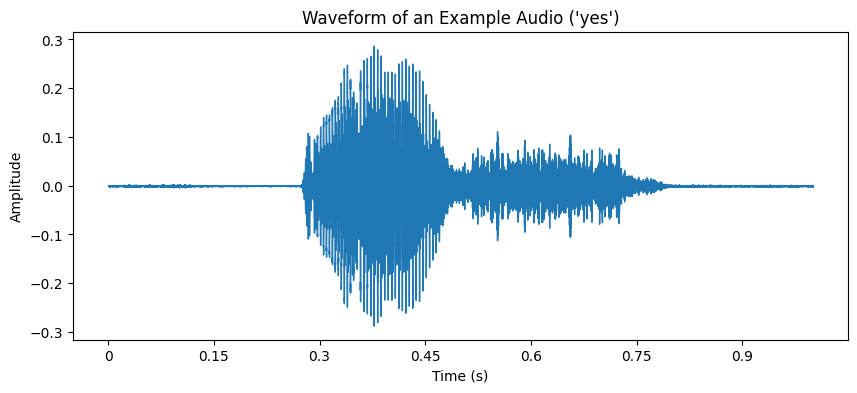

In [13]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform.numpy().squeeze(), sr=sample_rate)
plt.title("Waveform of an Example Audio ('yes')")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


Extract MFCC features

In [15]:
def extract_mfcc(waveform, sample_rate, n_mfcc=13):
    mfcc_transform = torchaudio.transforms.MFCC(
        sample_rate=sample_rate,
        n_mfcc=n_mfcc,
        melkwargs={"n_fft": 400, "hop_length": 160, "n_mels": 40}
    )
    return mfcc_transform(waveform)

mfcc = extract_mfcc(waveform, sample_rate)

print(mfcc)

tensor([[[-2.7675e+02, -2.7888e+02, -2.8013e+02,  ..., -2.6258e+02,
          -2.7158e+02, -2.6039e+02],
         [ 2.4614e+01,  2.9845e+01,  2.2823e+01,  ...,  3.7271e+01,
           3.2027e+01,  4.1045e+01],
         [-1.4753e-01, -6.7914e+00, -9.3400e+00,  ..., -8.3017e+00,
           2.2500e+00, -2.6533e+00],
         ...,
         [-4.5388e+00, -1.3707e+01, -1.3714e+01,  ..., -8.2457e+00,
          -8.3930e+00,  2.0910e-01],
         [-8.2791e-01, -8.1779e+00, -6.2551e+00,  ..., -6.5436e+00,
          -9.1253e-01,  9.4470e+00],
         [ 1.9636e+00,  5.9726e+00,  6.6877e+00,  ..., -8.1519e+00,
          -4.5471e-01,  4.6894e+00]]])


higher mfcc coefficients means captures better details

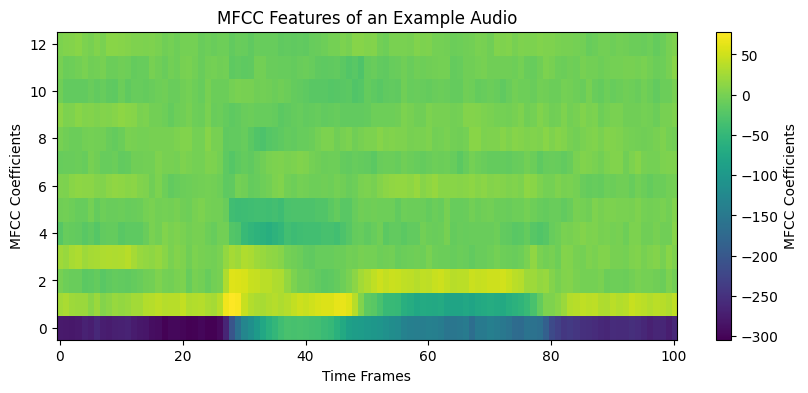

In [17]:
plt.figure(figsize=(10, 4))
plt.imshow(mfcc.squeeze().numpy(), cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCC Features of an Example Audio")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.show()


Extract MFCC spectrogram


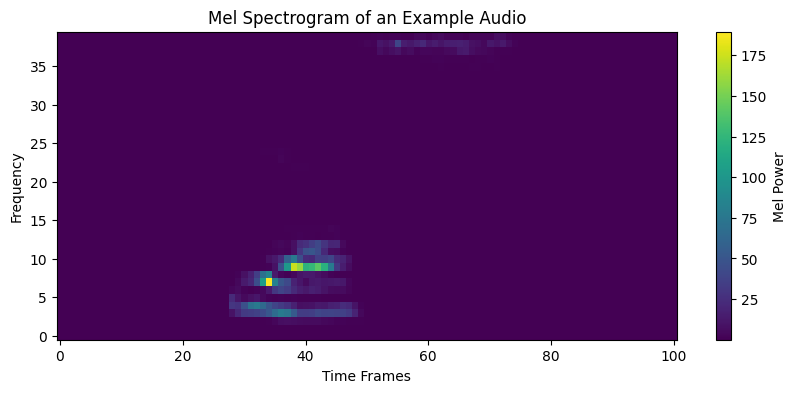

In [19]:
def extract_mel_spectrogram(waveform, sample_rate):
    mel_spec_transform = torchaudio.transforms.MelSpectrogram(
        sample_rate=sample_rate, n_mels=40, n_fft=400, hop_length=160
    )
    return mel_spec_transform(waveform)


## relation of waveform variable with dataset?
mel_spectrogram = extract_mel_spectrogram(waveform, sample_rate)

plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram.squeeze().numpy(), cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label="Mel Power")
plt.title("Mel Spectrogram of an Example Audio")
plt.xlabel("Time Frames")
plt.ylabel("Frequency")
plt.show()


Preprocess Pipeline

In [18]:
def preprocess_audio(filepath, n_mfcc=13):
    waveform, sample_rate = load_audio(filepath)

    # Normalize waveform
    waveform = waveform / waveform.abs().max()

    # Trim silence using librosa
    waveform_np = waveform.numpy().squeeze()
    waveform_trimmed, _ = librosa.effects.trim(waveform_np, top_db=20)
    waveform = torch.tensor(waveform_trimmed).unsqueeze(0)

    # Extract MFCC features
    mfcc = extract_mfcc(waveform, sample_rate, n_mfcc)

    return mfcc


In [21]:
import numpy as np

mfcc_data = []
labels = []

for label in labels:
    label_path = os.path.join(dataset_path, label)
    for filename in os.listdir(label_path):
        filepath = os.path.join(label_path, filename)
        mfcc_features = preprocess_audio(filepath).squeeze(0).numpy()
        mfcc_data.append(mfcc_features)
        labels.append(label)

# Save processed features
np.save("speech_commands_mfcc.npy", mfcc_data)
np.save("speech_commands_labels.npy", labels)
